In [1]:
import pandas as pd 
dataset = r'C:\Users\HP\Desktop\final_hypertension.csv'
df=pd.read_csv(dataset)
print(df)

     White Blood Cell Count (WBC)  Red Blood Cell Count (RBC)  \
0                            8.66                        4.65   
1                            6.24                        4.21   
2                            9.66                        3.29   
3                            5.29                        3.57   
4                            7.65                        2.65   
..                            ...                         ...   
995                          8.04                        5.87   
996                          8.13                        4.56   
997                          4.60                        1.56   
998                          2.40                        5.32   
999                         13.86                        3.81   

     Hemoglobin(HGB)  Hematocrit (HCT)  Mean Corpuscular Volume (MCV)  \
0               11.2              40.2                           85.6   
1                8.5              35.6                           84.0   


In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   White Blood Cell Count (WBC)                      1000 non-null   float64
 1   Red Blood Cell Count (RBC)                        1000 non-null   float64
 2   Hemoglobin(HGB)                                   1000 non-null   float64
 3   Hematocrit (HCT)                                  1000 non-null   float64
 4   Mean Corpuscular Volume (MCV)                     1000 non-null   float64
 5   Mean Corpuscular Hemoglobin Concentration (MCHC)  1000 non-null   float64
 6   Platelet Count (PLT)                              1000 non-null   int64  
 7   Disease                                           1000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Assuming the first 7 columns are features and the last one is the output (disease)
X = df.iloc[:, :7]  # Features
Y = df.iloc[:, 7]   # Output

# Split the data into training and testing sets (80% training, 20% testing)
print(X)

     White Blood Cell Count (WBC)  Red Blood Cell Count (RBC)  \
0                            8.66                        4.65   
1                            6.24                        4.21   
2                            9.66                        3.29   
3                            5.29                        3.57   
4                            7.65                        2.65   
..                            ...                         ...   
995                          8.04                        5.87   
996                          8.13                        4.56   
997                          4.60                        1.56   
998                          2.40                        5.32   
999                         13.86                        3.81   

     Hemoglobin(HGB)  Hematocrit (HCT)  Mean Corpuscular Volume (MCV)  \
0               11.2              40.2                           85.6   
1                8.5              35.6                           84.0   


In [5]:
print(Y)


# Save the trained model



0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Disease, Length: 1000, dtype: int64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 5)

# Feature scaling - important for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model and its parameters
k = 5  # Number of neighbors
weights = 'distance'  # Weight points by the inverse of their distance
algorithm = 'auto'  # Algorithm used to compute the nearest neighbors (auto selects the best one)

# Initialize the model
model = KNeighborsClassifier(n_neighbors=k, weights=weights, algorithm=algorithm)

# Train the model
model.fit(X_train, Y_train)

# Predict the output for the test set
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.99
Confusion Matrix:
[[ 96   0]
 [  2 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.98      0.99       104

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



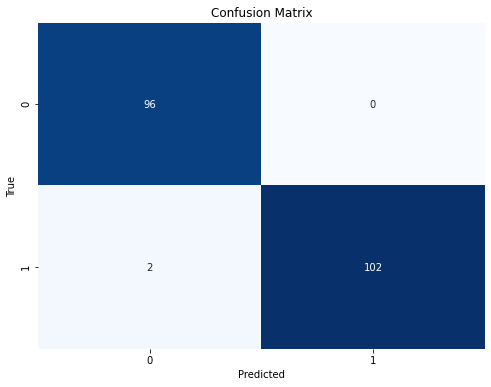

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
joblib.dump(model, 'knn_model.pkl')
# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [24]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import joblib
# Load the trained model
def load_model():
    # Assuming you already have a trained weighted KNN model saved as 'knn_model.pkl'
    # Load the model using joblib or pickle
    # Example:
    model = joblib.load('knn_model.pkl')
    return model
    pass

# Function to preprocess input data
def preprocess_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform([data])
    return data_scaled

# Function to predict disease
def predict_disease(data):
    model = load_model()
    if model:
        preprocessed_data = preprocess_data(data)
        prediction = model.predict(preprocessed_data)
        return prediction[0]
    else:
        messagebox.showerror("Error", "Model loading failed!")
        return None

# Function to handle predict button click
def on_predict():
    try:
        parameters = [float(entry.get()) for entry in entries]
        prediction = predict_disease(parameters)
        if prediction is not None:
            if prediction == 1:
            
                messagebox.showinfo("Prediction", "High likelihood of hypertension disease.")
            else:
                messagebox.showinfo("Prediction", "Low likelihood of hypertension disease.")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numerical values for all parameters.")

# Create main window
root = tk.Tk()
root.title("Hypertension Disease Prediction")

# Create entry fields for parameters
parameters = ["Parameter 1", "Parameter 2", "Parameter 3", "Parameter 4", "Parameter 5", "Parameter 6", "Parameter 7"]
entries = []
for i, param in enumerate(parameters):
    tk.Label(root, text=param).grid(row=i, column=0, padx=5, pady=5)
    entry = tk.Entry(root)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# Create predict button
predict_button = tk.Button(root, text="Predict", command=on_predict)
predict_button.grid(row=len(parameters), columnspan=2, padx=5, pady=10)

# Run the main event loop
root.mainloop()
